In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def moving_average(x, w=3):
    out = np.zeros_like(x)
    n   = out.size
    for ii in range(n):
        start_ind = np.max([0,ii - w])        
        end_ind   = np.min([n,ii + w])
        out[ii]   = np.mean(x[start_ind:end_ind])
    return out

In [3]:
def read_exaalt_output(fn):
    episode = 0
    eps = []
    steps = []
    rewards = []
    for line in open(fn):
        data = line.split()
        if data[0] == '1':
            episode += 1
        eps.append(episode)
        steps.append(int(data[0]))
        rewards.append(float(data[3]))
    return pd.DataFrame({'episode':eps, 'step':steps, 'reward':rewards})


In [10]:
fn = 'testing/30_08_2023_12-21-10_Exaalt_sync_medgraph_greedy_25_25_noisey_0'
log_dfs = []
log_dfs.append(read_exaalt_output(fn))

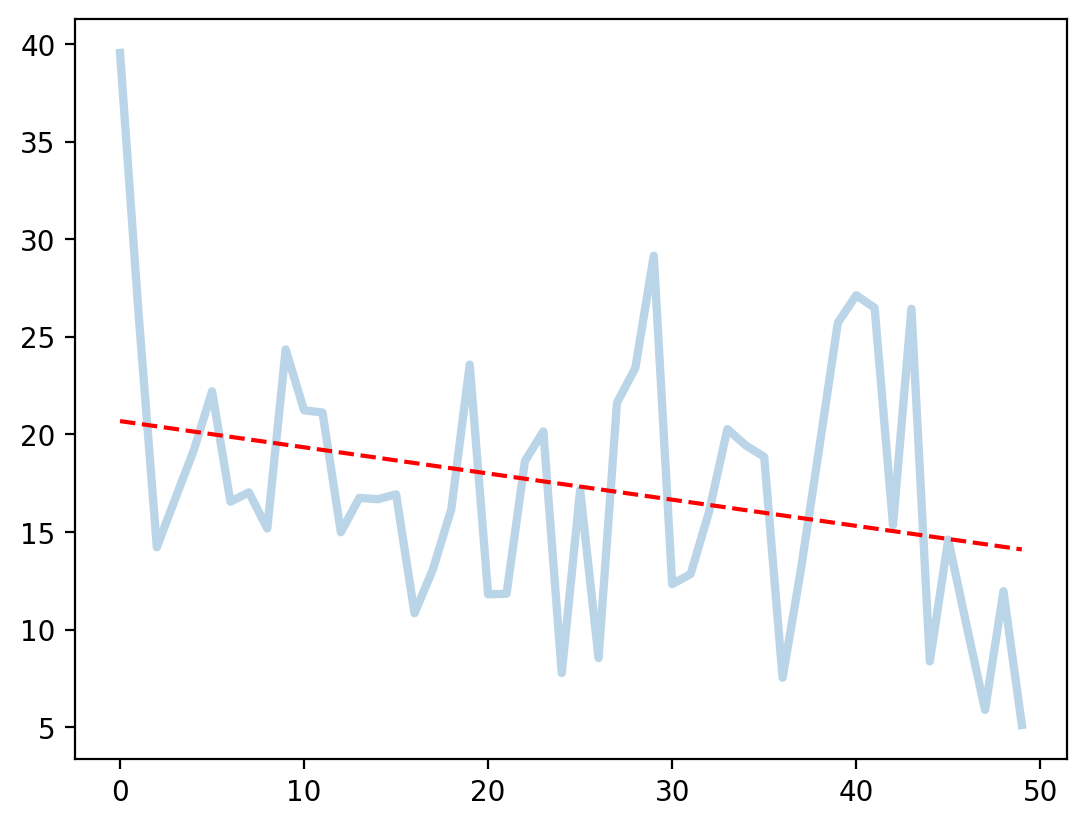

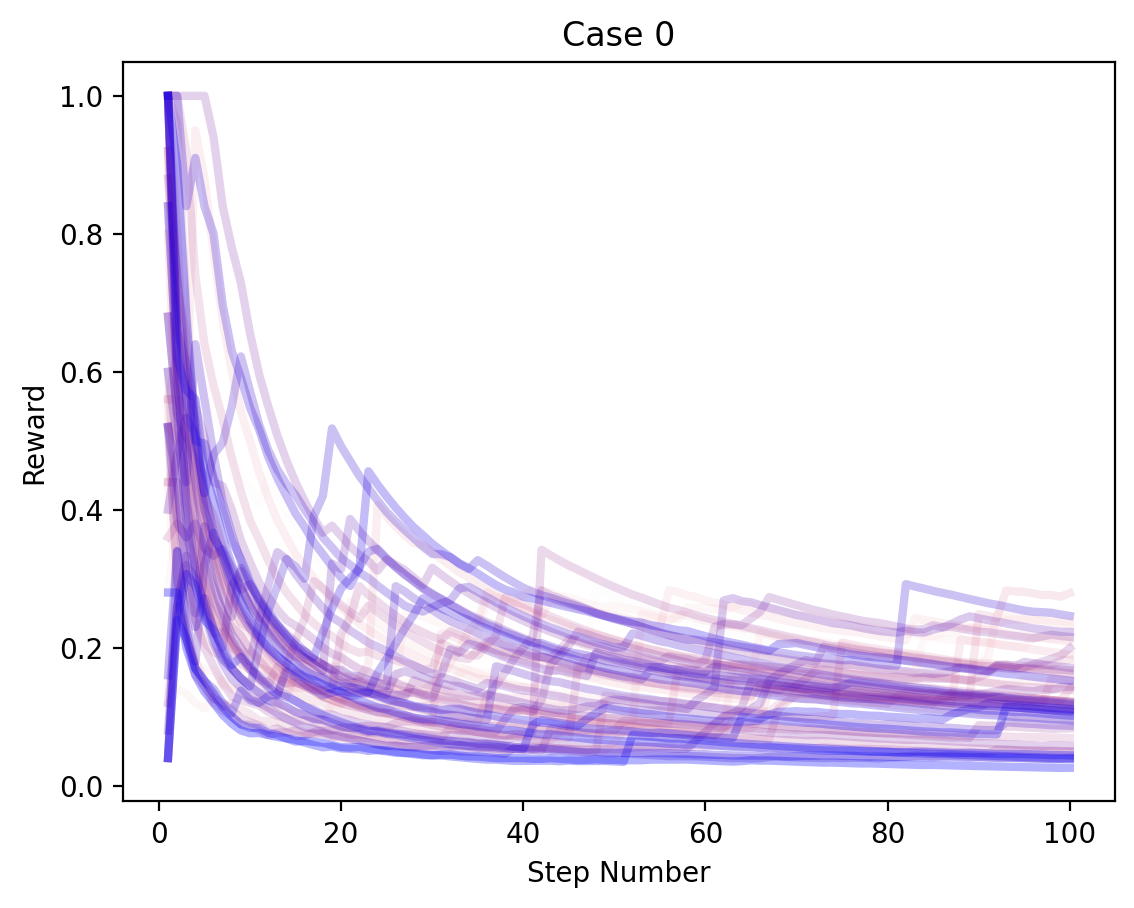

In [11]:
n_cases       = len(log_dfs)
cases         = ["Case " + str(ii) for ii in np.arange(n_cases)]

episodes      = []
total_rewards = []

for case in log_dfs[:n_cases]:
    min_ep = case["episode"].min() - 1
    max_ep = case["episode"].max() + 1
    tr = []
    ep = []
    for jj in range(min_ep, max_ep):
        if np.sum(case["episode"] == (jj + 1)) > 0:
            tr.append(np.sum(case["reward"][case["episode"] == jj + 1 ].values))
            ep.append(jj)
    episodes.append(np.array(ep))
    total_rewards.append(np.array(tr))

plt.figure(dpi=200)
for ii in range(n_cases):
    z = np.polyfit(episodes[ii], total_rewards[ii], 1)
    p = np.poly1d(z)
    plt.plot(episodes[ii], total_rewards[ii], linewidth=3, label=cases[ii], alpha=0.3)
    plt.plot(episodes[ii], p(episodes[ii]),"r--")

# plt.legend(loc="lower right")

plt.show()

plt.figure(dpi=200)
for ii in range(n_cases):
    min_ep = log_dfs[ii]["episode"].min()
    max_ep = log_dfs[ii]["episode"].max()
    for jj in range(min_ep, max_ep):
        if np.sum(log_dfs[ii]["episode"] == (jj + 1)) > 0:
            x = log_dfs[ii]["step"][log_dfs[ii]["episode"] == (jj+1)]
            y = log_dfs[ii]["reward"][log_dfs[ii]["episode"] == (jj+1)]
            z = np.polyfit(x, y, 1)
            p = np.poly1d(z)
            plt.plot(x,y, alpha = 0.3*(jj/(max_ep-1)), linewidth=3, c=(1 - jj/(max_ep-1), 0., jj/(max_ep-1)))
#             plt.plot(x, p(x),alpha = 0.3*(jj/(max_ep-1)), linewidth=3, c=(1 - jj/(max_ep-1), 0., jj/(max_ep-1)))
    plt.title(cases[ii])
    plt.xlabel("Step Number")
    plt.ylabel("Reward")
    #plt.show()

In [33]:
def read_exaalt_output_change(fn):
    episode = -1
    eps = []
    for line in open(fn):
        data = line.split()
        if data[0] == '1':
            episode += 1
            eps.append([])
        eps[episode].append((int(data[0]),float(data[3])))
    return eps

In [34]:
fn = 'testing/30_08_2023_08-04-02_Exaalt_sync_smallgraph_firstpos_0'
eps = read_exaalt_output_change(fn)

[25.86539322 20.29610812 29.65501965 15.79991964 22.77739865 21.37276662
 19.42006294 22.07072315 19.52387202 30.07631479 23.70558295 19.91894318
 20.30726247 20.46077621 22.9045572  18.31313382 21.29421034 17.81775061
 20.84158281 22.42648713 19.6595135  16.31678782 24.20052146 22.13565529
 21.72758986 18.63553497 24.05353613 22.38900716 26.80157482 17.75889727
 24.74441949 25.09940543 19.79891948 22.14578359 23.14724611 17.65636146
 19.62710449 20.89003311 19.29313884 23.23647199 18.65440881 20.60628952
 17.68387972 22.93841026 22.05302476 20.8521786  20.61347942 33.02025271
 22.12842755 27.49421256]


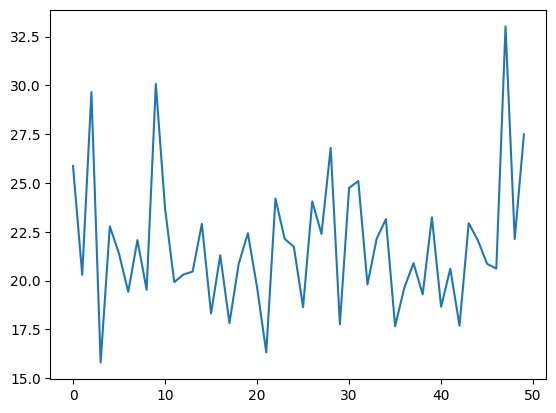

In [35]:
steps = 100
test = []
episode_reward_tot = np.zeros(len(eps))
for i in range(len(eps)):
    for j in range (len(eps[0])):
        episode_reward_tot[i] += eps[i][j][1]
        
    
print(episode_reward_tot)
plt.plot(episode_reward_tot)